In [88]:
import numpy as np
import matplotlib.pyplot as plt
n=50
samples = np.arange(n) 
sampling_rate=100
wave_velocity=8000


In [89]:
# def generate_signals(frequency=5, n=50, sampling_rate=100):
#     dt = 1 / sampling_rate
#     time = np.arange(n) * dt
#     noise_freqs = [15, 30, 45]
#     amplitudes = [0.5, 0.3, 0.1]

#     original_signal = np.sin(2 * np.pi * frequency * time)
#     noise_signal = sum(a * np.sin(2 * np.pi * f * time) for f, a in zip(noise_freqs, amplitudes))
#     noisy_signal = original_signal + noise_signal

#     shift_samples = np.random.randint(-n // 2, n // 2)
#     shifted_signal = np.roll(noisy_signal, shift_samples)
    

#     return original_signal, shifted_signal

In [90]:
def generate_signals(frequency=5):

    noise_freqs = [15, 30, 45]  # Default noise frequencies in Hz

    amplitudes = [0.5, 0.3, 0.1]  # Default noise amplitudes
    noise_freqs2 = [10, 20, 40] 
    amplitudes2 = [0.3, 0.2, 0.1]
    
     # Discrete sample indices
    dt = 1 / sampling_rate  # Sampling interval in seconds
    time = samples * dt  # Time points corresponding to each sample


    # Original clean signal (sinusoidal)
    original_signal = np.sin(2 * np.pi * frequency * time)
    #print("original len:",original_signal)

    # Adding noise
    noise_for_sigal_A = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                for noise_freq, amplitude in zip(noise_freqs, amplitudes))
    noise_for_sigal_B = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                for noise_freq, amplitude in zip(noise_freqs2, amplitudes2))
    signal_A = original_signal + noise_for_sigal_A 
    noisy_signal_B = signal_A + noise_for_sigal_B

    # Applying random shift
    shift_samples = np.random.randint(-n // 2, n // 2)  # Random shift
    print(f"Shift Samples: {shift_samples}")
    signal_B = np.roll(noisy_signal_B, shift_samples)
    
    return signal_A, signal_B

Shift Samples: 18


<StemContainer object of 3 artists>

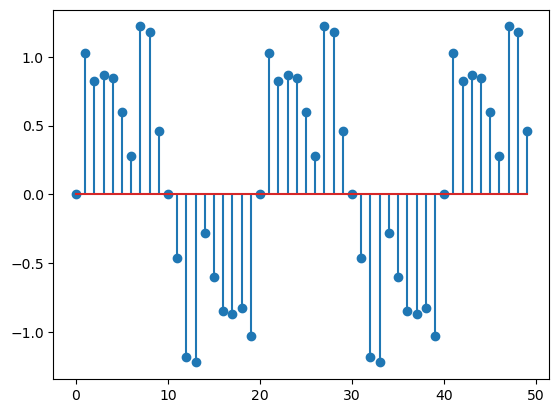

In [91]:
A,B = generate_signals()
plt.stem(A)


<StemContainer object of 3 artists>

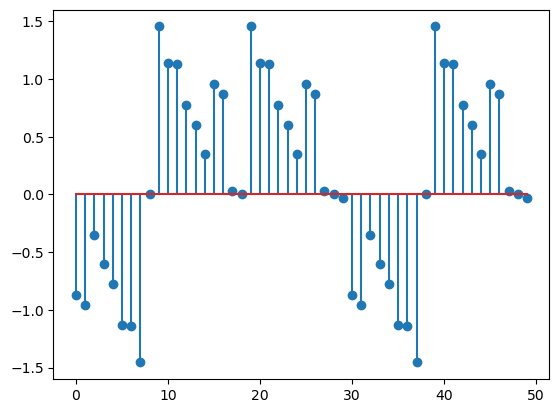

In [92]:
plt.stem(B)

In [93]:
def DFT(signal):
    N = len(signal)
    return_signal_real = np.zeros(N)
    return_signal_img = np.zeros(N)
    for i in range(N):
        for j in range(N):
            return_signal_real[i] += signal[j]*np.cos(2*np.pi*i*j/N)
            return_signal_img[i] += -1*signal[j]*np.sin(2*np.pi*i*j/N)
    return return_signal_real,return_signal_img

<StemContainer object of 3 artists>

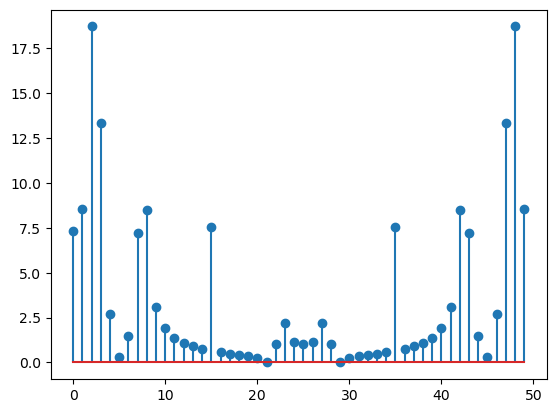

In [94]:
fAreal,fAimg = DFT(A)
plt.stem(samples,np.sqrt(fAreal**2+fAimg**2))

<StemContainer object of 3 artists>

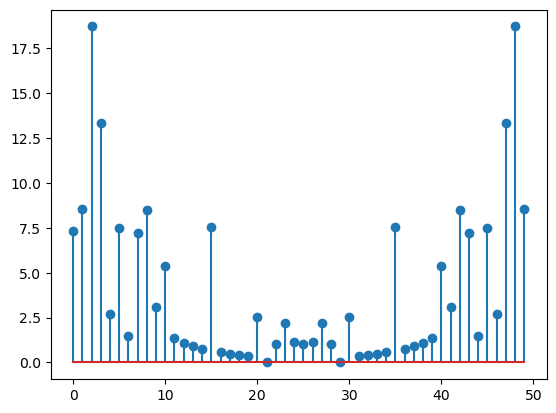

In [95]:
fBreal,fBimg = DFT(B)
plt.stem(samples,np.sqrt(fBreal**2+fBimg**2))

In [96]:
DFTCrossCorrelationRealPart = fAreal*fBreal+fAimg*fBimg
#plt.stem(DFTCrossCorrelationRealPart)

In [97]:
DFTCrossCorrelationImgPart = -fAreal*fBimg+fAimg*fBreal
#plt.stem(DFTCrossCorrelationImgPart)

In [98]:
#plt.stem(np.sqrt(DFTCrossCorrelationRealPart**2+DFTCrossCorrelationImgPart**2))

In [99]:
signal = [DFTCrossCorrelationRealPart,DFTCrossCorrelationImgPart] 

In [100]:
def IDFT(signal):
    signal_real = signal[0]
    signal_img = signal[1]
    N = len(signal_real)
    return_signal_real = np.zeros(N)
    for i in range(N):
        for j in range(N):
            return_signal_real[i] += (signal_real[j]*np.cos(2*np.pi*i*j/N)-signal_img[j]*np.sin(2*np.pi*i*j/N))
    return return_signal_real/N

In [101]:
# def IDFT(signal):
#     signal_real = signal[0]
#     signal_img = signal[1]
#     N = len(signal_real)
#     return_signal_real = np.zeros(N)
#     for i in range(N):
#         for j in range(N):
#             return_signal_real[i] += (
#                 signal_real[j] * np.cos(2 * np.pi * i * j / N)
#                 - signal_img[j] * np.sin(2 * np.pi * i * j / N)
#             )
#     return return_signal_real / N  # Normalize by N


In [102]:
n = 50
index = np.floor(n/2)
x = np.arange(-index,n-index)
x

array([-25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
       -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
         8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,  20.,  21.,  22.,  23.,  24.])

<StemContainer object of 3 artists>

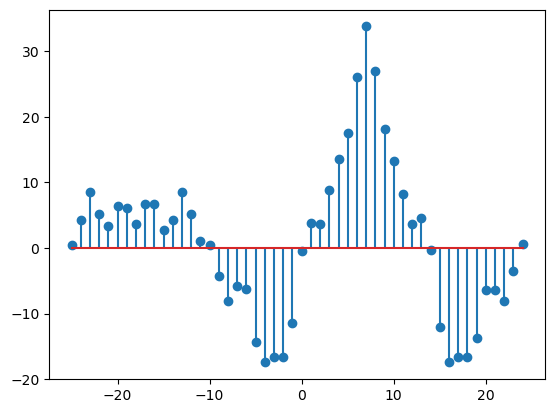

In [103]:
CrossCorrInTimeDomain = IDFT(signal)

plt.stem(x,CrossCorrInTimeDomain)

In [104]:
sample_lag = np.argmax(CrossCorrInTimeDomain)
sample_lag = n-sample_lag if sample_lag>n//2 else -sample_lag
sample_lag

18

In [106]:
distance = sample_lag * wave_velocity * (1/sampling_rate)
print(distance)

1440.0
